<center><h1>Data Analysis<h1><center>

---

In [8]:
from Metrics import getSentiment, getFactBased, getSensationalized
import json
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\britt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
print("Loading File")
file = open("rust-articles-backup.json", encoding="utf8")
articles = pd.DataFrame.from_dict(json.load(file))
print("File Loaded")

Loading File
File Loaded


In [3]:
# print(articles['publisher'].value_counts())
# print(articles['categories'].value_counts())
print(articles.columns)
# print(articles['body'][articles['categories'].str.contains('leonardo dicaprio')].reset_index(drop=True)[1])
# print(articles['body'][articles['categories'].str.contains('opinion')].reset_index(drop=True)[1])

Index(['url', 'publisher', 'headline', 'twitterHeadline', 'description',
       'categories', 'body', 'images', 'thumbnail', 'videos', 'datePublished',
       'dateUpdated', 'dateParsed'],
      dtype='object')


Get Sentiment Test

In [4]:
a = 2
for i in range(a*2,a*2+2):
    sentiment = getSentiment(articles.at[i,'body'])
    #print(articles.at[i,'body'])
    print(sentiment)
    print()

{'neg': 0.038, 'neu': 0.886, 'pos': 0.077, 'compound': 0.9554}

{'neg': 0.088, 'neu': 0.842, 'pos': 0.07, 'compound': -0.8484}



Get Factbased Test

In [5]:
count = 0
total = 0
opp = []
o = articles[articles['categories'].str.contains('opinion')].reset_index(drop=True)
for i in range(len(o)):
    factBased,_,_ = getFactBased(o.at[i,'body'])
    # print(ob.at[i,'body'])
    # print(factBased)
    count += 1
    total += factBased
    opp.append(factBased)
print('Opinion:',count, round(total/count,5))

count = 0
total = 0
fac = []
f = articles[~articles['categories'].str.contains('opinion')].reset_index(drop=True)
for i in range(len(f)):
    factBased,_,_ = getFactBased(f.at[i,'body'])
    # print(fb.at[i,'body'])
    # print(factBased)
    count += 1
    total += factBased
    fac.append(factBased)
print('Fact:',count, round(total/count,5))

count = 0
total = 0
all = []
quotes = []
for i in range(len(articles)):
    factBased,quote,_ = getFactBased(articles.at[i,'body'])
    # print(fb.at[i,'body'])
    # print(factBased)
    count += 1
    total += factBased
    all.append(factBased)
    quotes.append(quote)
print('All:',count, round(total/count,5))
print(Counter(quotes))

Opinion: 1840 0.13374
Fact: 159385 0.17788
All: 161225 0.17737
Counter({0: 70299, 2: 8892, 4: 6483, 6: 5562, 8: 5320, 10: 5135, 12: 4506, 14: 4033, 16: 3496, 18: 3027, 11: 2572, 13: 2561, 9: 2559, 20: 2477, 7: 2331, 22: 2258, 15: 2230, 17: 1981, 5: 1956, 24: 1844, 19: 1761, 21: 1460, 26: 1456, 3: 1313, 23: 1257, 28: 1202, 30: 1070, 25: 1029, 27: 911, 32: 906, 34: 713, 29: 710, 1: 673, 31: 595, 36: 571, 38: 495, 33: 469, 40: 414, 35: 405, 42: 350, 37: 342, 39: 301, 44: 269, 46: 235, 41: 229, 43: 202, 48: 185, 50: 162, 45: 153, 47: 135, 52: 131, 54: 130, 49: 108, 56: 96, 51: 81, 58: 81, 62: 77, 55: 71, 53: 65, 68: 50, 57: 49, 60: 46, 61: 45, 59: 45, 70: 43, 64: 41, 66: 37, 67: 30, 63: 29, 65: 29, 69: 27, 74: 22, 72: 21, 76: 21, 71: 19, 78: 18, 80: 18, 75: 14, 82: 13, 90: 13, 102: 11, 84: 11, 79: 11, 88: 10, 77: 9, 73: 9, 85: 8, 81: 8, 98: 8, 89: 7, 92: 7, 86: 7, 94: 6, 104: 6, 100: 6, 111: 5, 96: 5, 112: 5, 83: 5, 91: 5, 95: 4, 118: 4, 101: 4, 126: 4, 106: 3, 120: 3, 109: 3, 105: 3, 138:

Regression Testing

In [6]:
from sklearn.linear_model import LinearRegression

training_x = pd.DataFrame([1,10,1,10])
training_y = pd.DataFrame([1,0,1,0])
testing_x = pd.DataFrame([2])

model = LinearRegression().fit(training_x.to_numpy(), training_y.to_numpy().ravel())
result = pd.DataFrame(model.predict(testing_x.to_numpy()))
result

,0
0,0.888889


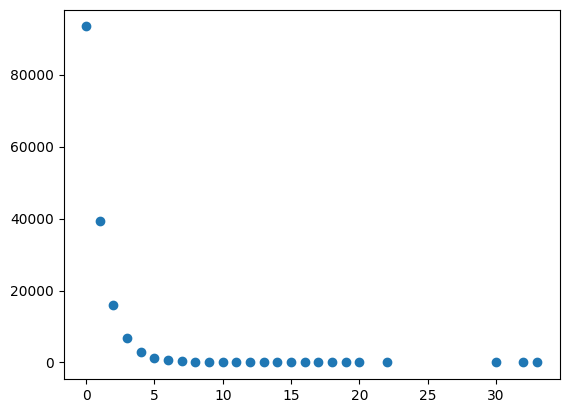

In [10]:
list = []
for i in range(len(articles)):
    sensationalzed = getSensationalized(articles.at[i,'body'])
    list.append(sensationalzed)
a = Counter(list)
plt.scatter(*zip(*a.items()))
plt.show()

{0.5: 10644, 0.2: 16062, 1: 219, 0.4: 15993, 0.3: 18021, 0.1: 14181, 0.0: 76160, 0.7: 2658, 0.6: 5787, 0.8: 1079, 0.9: 421}


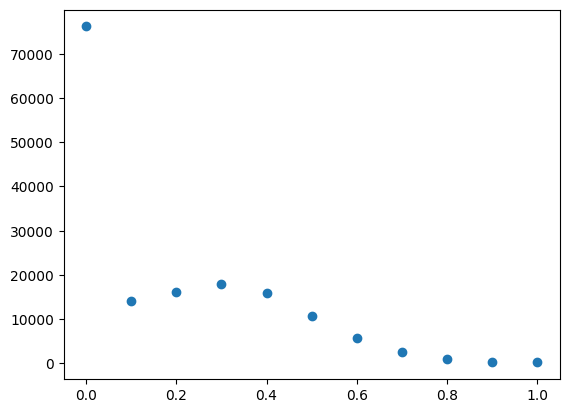

In [12]:
a = {}
for fb in all:
    try:
        a[round(fb,1)] += 1
    except:
        a[round(fb,1)] = 1

print(a)
plt.scatter(*zip(*a.items()))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
b = dict(Counter(list))
b = dict(Counter([1,7,7,7,3,9,9,7,7,9,10,0]))

In [ ]:
#print(list)
articles.at[37914,'body'] #list.index(33)
articles.at[13149,'body'] #list.index(10)
articles.at[210,'body'] #list.index(5)
articles.at[5,'body'] #list.index(2)
articles.at[8,'body'] #list.index(8)
list.index(1)

8

In [ ]:
a = 'hello hello'
a.count('hello')

2